In [19]:
import pandas as pd
import numpy as np

In [20]:
dis=pd.read_csv(r"C:\Users\91964\Downloads\heart_disease_data_updated.csv")
dis.head()

,Age,Gender,Cholesterol,RestingBP,Smoking,HeartDisease
0,68,Male,258.9,140.3,0,Unhealthy
1,58,Male,281.8,139.5,0,Unhealthy
2,44,Male,233.8,118.5,0,Healthy
3,72,Male,257.0,116.4,0,Unhealthy
4,37,Male,244.3,144.8,1,Unhealthy


<h1 style="color:red">DATA CLEANING</h1>

In [21]:
dis.isna().sum()

Age             0
Gender          0
Cholesterol     0
RestingBP       0
Smoking         0
HeartDisease    0
dtype: int64

In [22]:
dis["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [23]:
dis["Gender"]=dis["Gender"].map({'Male':1, 'Female':0})
dis

,Age,Gender,Cholesterol,RestingBP,Smoking,HeartDisease
0,68,1,258.9,140.3,0,Unhealthy
1,58,1,281.8,139.5,0,Unhealthy
2,44,1,233.8,118.5,0,Healthy
3,72,1,257.0,116.4,0,Unhealthy
4,37,1,244.3,144.8,1,Unhealthy
...,...,...,...,...,...,...
295,62,1,170.3,140.2,0,Healthy
296,53,1,227.3,105.0,0,Healthy
297,40,0,234.1,141.4,0,Healthy
298,78,1,241.3,180.0,1,Unhealthy


In [24]:
dis["HeartDisease"].unique()

array(['Unhealthy', 'Healthy'], dtype=object)

In [25]:
dis["HeartDisease"]=dis["HeartDisease"].map({'Unhealthy':0, 'Healthy':1})
dis

,Age,Gender,Cholesterol,RestingBP,Smoking,HeartDisease
0,68,1,258.9,140.3,0,0
1,58,1,281.8,139.5,0,0
2,44,1,233.8,118.5,0,1
3,72,1,257.0,116.4,0,0
4,37,1,244.3,144.8,1,0
...,...,...,...,...,...,...
295,62,1,170.3,140.2,0,1
296,53,1,227.3,105.0,0,1
297,40,0,234.1,141.4,0,1
298,78,1,241.3,180.0,1,0


<h1 style="color:red">DATA ANALYSIS </h1>

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
dis.corr()

,Age,Gender,Cholesterol,RestingBP,Smoking,HeartDisease
Age,1.000000,0.140139,0.037343,0.050159,-0.011595,-0.444281
Gender,0.140139,1.000000,0.006445,-0.037548,-0.094642,-0.047987
Cholesterol,0.037343,0.006445,1.000000,0.021727,0.019225,-0.227699
RestingBP,0.050159,-0.037548,0.021727,1.000000,-0.079892,-0.210548
Smoking,-0.011595,-0.094642,0.019225,-0.079892,1.000000,-0.556600
HeartDisease,-0.444281,-0.047987,-0.227699,-0.210548,-0.556600,1.000000


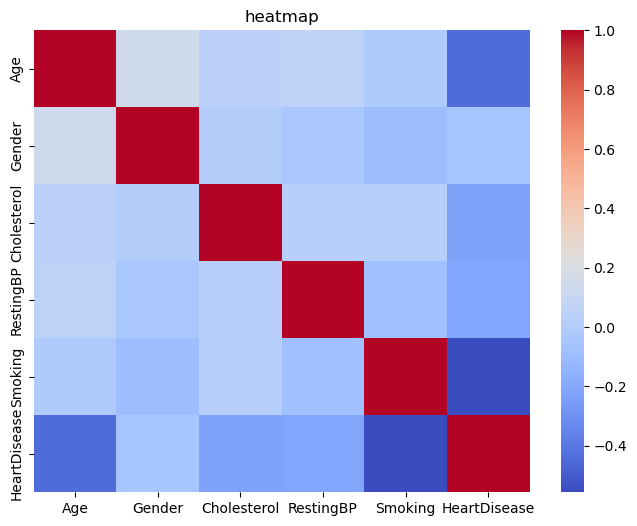

In [46]:
plt.figure(figsize=(8,6))
sns.heatmap(dis.corr(),cmap="coolwarm")
plt.title("heatmap")
plt.show()

<h1 style="color:red">VISUALISATION</h1>

Text(0.5, 1.0, 'heart disease status by gender')

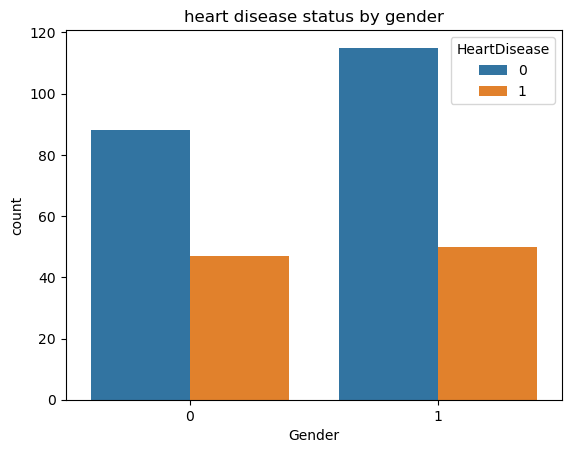

In [57]:
sns.countplot(x=dis["Gender"],hue=dis["HeartDisease"])
plt.title("heart disease status by gender")

Text(0.5, 1.0, 'Cholestrol level by Heart Disease Status')

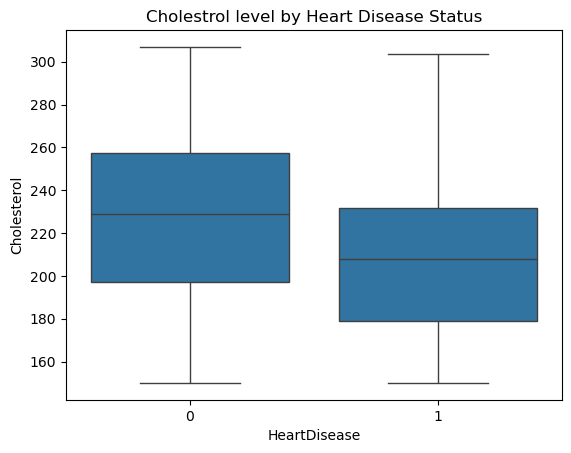

In [63]:
sns.boxplot(data=dis,x='HeartDisease',y='Cholesterol')
plt.title("Cholestrol level by Heart Disease Status")

Text(0.5, 1.0, 'Resting Blood Pressure vs. Cholesterol')

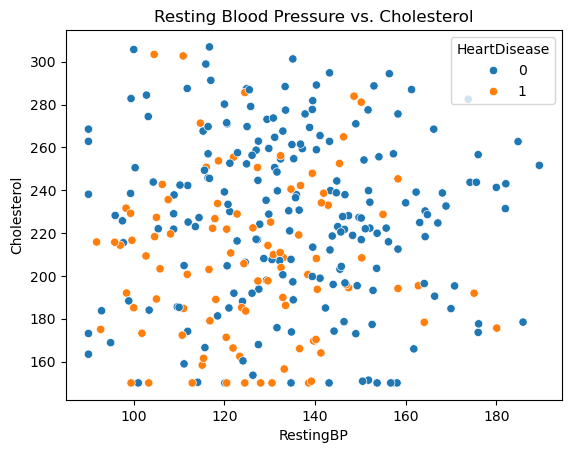

In [73]:
sns.scatterplot(data=dis, x='RestingBP', y='Cholesterol', hue='HeartDisease')
plt.title('Resting Blood Pressure vs. Cholesterol')

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x=dis.drop('HeartDisease',axis=1)
x

,Age,Gender,Cholesterol,RestingBP,Smoking
0,68,1,258.9,140.3,0
1,58,1,281.8,139.5,0
2,44,1,233.8,118.5,0
3,72,1,257.0,116.4,0
4,37,1,244.3,144.8,1
...,...,...,...,...,...
295,62,1,170.3,140.2,0
296,53,1,227.3,105.0,0
297,40,0,234.1,141.4,0
298,78,1,241.3,180.0,1


In [83]:
y=dis["HeartDisease"]
y

0      0
1      0
2      1
3      0
4      0
      ..
295    1
296    1
297    1
298    0
299    1
Name: HeartDisease, Length: 300, dtype: int64

In [85]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

<h2 style="color:red"h1>MODEL BUILDING </h2>

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
model=RandomForestRegressor(n_estimators=100,random_state=42)

In [89]:
model.fit(xtrain,ytrain)

RandomForestRegressor(random_state=42)

<h2 style="color:red"h1>PREDICTION </h2>

In [90]:
y_pred=model.predict(xtest)
y_pred

array([0.  , 0.12, 0.05, 0.35, 0.38, 0.  , 0.23, 0.  , 0.  , 0.35, 0.29,
       0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.61, 0.89, 0.  , 0.06, 0.01,
       0.09, 0.  , 0.88, 0.01, 0.  , 0.6 , 0.23, 0.  , 0.  , 0.  , 0.  ,
       0.23, 0.02, 0.  , 0.  , 0.  , 1.  , 0.75, 0.12, 0.  , 0.  , 0.98,
       0.09, 0.  , 0.03, 0.81, 0.  , 1.  , 0.19, 0.  , 1.  , 0.05, 0.99,
       0.04, 1.  , 0.  , 0.  , 0.  ])

In [91]:
sample=xtest.iloc[0:1]
prediction=model.predict(sample)
print("heart disease=",prediction)

heart disease= [0.]


In [92]:
sample

,Age,Gender,Cholesterol,RestingBP,Smoking
203,53,1,167.9,127.5,1


In [93]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE:",mean_absolute_error(ytest,y_pred))
print("MSE:",np.sqrt(mean_squared_error(ytest,y_pred)))
print("R2:",r2_score(ytest,y_pred))

MAE: 0.0775
MSE: 0.15180579699076052
R2: 0.8642193126022912


In [97]:
sample.columns

Index(['Age', 'Gender', 'Cholesterol', 'RestingBP', 'Smoking'], dtype='object')

In [101]:
new=pd.DataFrame([{'Age':68, 'Gender':0, 'Cholesterol':258.9, 'RestingBP':140.3, 'Smoking':0}])
new

,Age,Gender,Cholesterol,RestingBP,Smoking
0,68,0,258.9,140.3,0


In [ ]:
new_pred=